# SheHacks Data Science Deliverables 

Given the lack of publicly available data on consumers perception of safety during a pandemic, I created my own survey to distribute to gain some insights. My team and I distributed on our social channels and received 92 respondents. Considering this is a self made survey it has many limitations from the bias in the survey itself to our distribution methods and sample pool. 

### Survey Details 

The survey is 13 questions long, 2 of which are used to gather age and gender data of the respondent. The next questions are on how comfortable the respondent would feel about different health and safety measures while attending an event. The final 2 questions are optional short responses to capture additional concerns over health and safety and features they would be looking for in an app. The survey was conducted on google forms.

In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading in csv 
survey= pd.read_csv('~/downloads/Perception_of_Safety.csv')

# making sure the data loaded correctly 
survey.head()

,Timestamp,What is your age?,What is your gender?,Have you used a mobile ticket to enter an event before?,"On a scale of 1-5, how comfortable would you feel having your temperature taken before entering an event?","On a scale of 1-5, how comfortable are you wearing a mask during the event?","On a scale of 1-5, how comfortable would you feel with hand sanitizer stations throughout the event space?","On a scale of 1-5, how comfortable would you feel attending an event knowing contact tracing was built into your ticketing app?",How likely are you to buy food at the event?,Would you be more likely to purchase food if you were able to order to your seat through an app?,How likely are you to buy merchandise at the event?,Would you be more likely to purchase merchandise if you were able to order to your seat through an app?,Anything else about health and safety at events that concerns you?,Any other features are you looking for from a ticketing/ events app?
0,2020/07/21 11:10:40 AM MDT,30,Female,Yes,5 - Very comfortable,4 - Comfortable,4 - Comfortable,4 - Comfortable,Likely,Yes,Not likely,Maybe,NaN,NaN
1,2020/07/21 11:13:40 AM MDT,32,Female,Yes,5 - Very comfortable,2 - Slightly not comfortable,5 - Very comfortable,2 - Slightly not comfortable,Likely,Yes,Neutral,Yes,I will be more comfortable attending the event...,"capsules method if there's a series of games, ..."
2,2020/07/21 11:53:12 AM MDT,20,Female,Yes,5 - Very comfortable,5 - Very comfortable,5 - Very comfortable,1 - Not comfortable,Likely,Yes,Not likely,No,Sitting near others,Have a seating section for people who are high...
3,2020/07/21 12:12:54 PM MDT,28,Male,Yes,5 - Very comfortable,4 - Comfortable,5 - Very comfortable,5 - Very comfortable,Likely,Maybe,Neutral,No,The virus is scary in itself but mass shooting...,NaN
4,2020/07/21 12:15:01 PM MDT,32,Female,Yes,5 - Very comfortable,5 - Very comfortable,3 - Neutral,1 - Not comfortable,Neutral,Yes,Very unlikely,Yes,NaN,NaN


In [4]:
# first I'm going to rename columns that way they are easier to call 
survey.rename(columns = {'What is your age? ': 'Age',
               'What is your gender? ': "Gender",
               'Have you used a mobile ticket to enter an event before? ':'Mobile Ticket',
              'On a scale of 1-5, how comfortable would you feel having your temperature taken before entering an event?' : 'Temp', 
              'On a scale of 1-5, how comfortable are you wearing a mask during the event? ': 'Mask', 
              'On a scale of 1-5, how comfortable would you feel with hand sanitizer stations throughout the event space? ' : "Sanitizer", 
              'On a scale of 1-5, how comfortable would you feel attending an event knowing contact tracing was built into your ticketing app? ' : 'Contact Tracing',
              'How likely are you to buy food at the event?': "Food", 
              'Would you be more likely to purchase food if you were able to order to your seat through an app? ': "Food App", 
              'How likely are you to buy merchandise at the event?' : "Merchandise", 
              'Would you be more likely to purchase merchandise if you were able to order to your seat through an app? ' : 'Merch App', 
             'Anything else about health and safety at events that concerns you? ' : 'Health Saftey Concerns', 
             'Any other features are you looking for from a ticketing/ events app?': 'Other features'}, inplace = True)

# confirming that all columns have changed 
survey.head()

,Timestamp,Age,Gender,Mobile Ticket,Temp,Mask,Sanitizer,Contact Tracing,Food,Food App,Merchandise,Merch App,Health Saftey Concerns,Other features
0,2020/07/21 11:10:40 AM MDT,30,Female,Yes,5 - Very comfortable,4 - Comfortable,4 - Comfortable,4 - Comfortable,Likely,Yes,Not likely,Maybe,NaN,NaN
1,2020/07/21 11:13:40 AM MDT,32,Female,Yes,5 - Very comfortable,2 - Slightly not comfortable,5 - Very comfortable,2 - Slightly not comfortable,Likely,Yes,Neutral,Yes,I will be more comfortable attending the event...,"capsules method if there's a series of games, ..."
2,2020/07/21 11:53:12 AM MDT,20,Female,Yes,5 - Very comfortable,5 - Very comfortable,5 - Very comfortable,1 - Not comfortable,Likely,Yes,Not likely,No,Sitting near others,Have a seating section for people who are high...
3,2020/07/21 12:12:54 PM MDT,28,Male,Yes,5 - Very comfortable,4 - Comfortable,5 - Very comfortable,5 - Very comfortable,Likely,Maybe,Neutral,No,The virus is scary in itself but mass shooting...,NaN
4,2020/07/21 12:15:01 PM MDT,32,Female,Yes,5 - Very comfortable,5 - Very comfortable,3 - Neutral,1 - Not comfortable,Neutral,Yes,Very unlikely,Yes,NaN,NaN


### Survey Visualizations 

From here I'm going to create the visualizations we'll need. I'll begin with our the data about our survey respondents and then just a few of the comfortable with health and safety questions. 

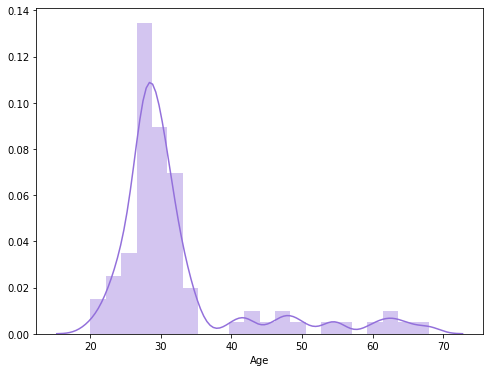

In [59]:
# creating a distribution plot for the age of respondent 
plt.figure(figsize = (8, 6))
#plt.title('Age of Survey Respondent', size= 18)
sns.distplot(survey['Age'] , color= 'mediumpurple', label= "Age" );

**Obeservation:** From this distribution we can see this is not a very diverse age range of respondents, most are late 20s / early 30s. 

In [5]:
# considering how few visualizations we need, I'm going to skip writing a function 
survey['Gender'].value_counts()

Female               51
Male                 40
Prefer not to say     1
Name: Gender, dtype: int64

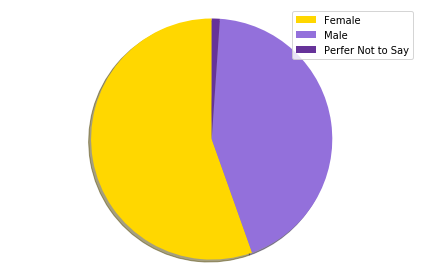

In [58]:
# creating pie chart of survey respose data
#plt.title('Gender of Survey Respondent', size= 14)
labels = ['Female', 'Male', 'Perfer Not to Say']
sizes = [51, 40, 1]
colors = ['gold', 'mediumpurple', 'rebeccapurple']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

**Observation:** Our respondent pool is 55% Female 

In [18]:
survey['Mobile Ticket'].value_counts()

Yes    89
No      3
Name: Mobile Ticket, dtype: int64

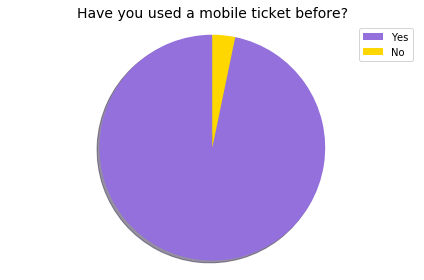

In [60]:
# creating pie chart of survey respose data
plt.title('Have you used a mobile ticket before?', size= 14)
labels = ['Yes', 'No']
sizes = [89, 3]
colors = [ 'mediumpurple', 'gold']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

**Observation:** Mobile tickets are something respondents are already familiar with. 

In [7]:
survey['Temp'].value_counts()

5 - Very comfortable            60
4 - Comfortable                 20
3 - Neutral                      7
2 - Slightly not comfortable     4
1 - Not comfortable              1
Name: Temp, dtype: int64

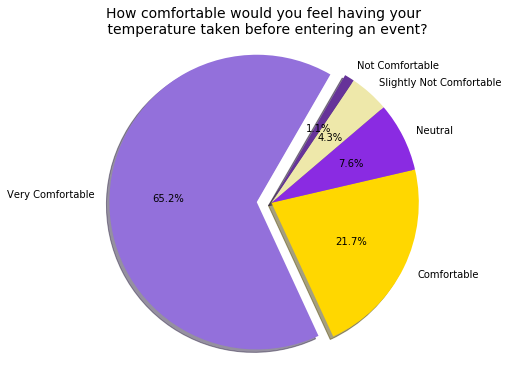

In [61]:
plt.figure(figsize = (6, 6))
plt.title('How comfortable would you feel having your \n temperature taken before entering an event?', size= 14)
labels = 'Very Comfortable', 'Comfortable','Neutral', 'Slightly Not Comfortable', 'Not Comfortable'
sizes = [60, 20, 7, 4, 1]
colors = ['mediumpurple', 'gold', 'blueviolet','palegoldenrod', 'rebeccapurple']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle= 60)

plt.axis('equal')
plt.show()

**Observation:** 86% of respondents are either comfortable or very comfortable having their tempature taken. 

In [9]:
survey['Mask'].value_counts()

5 - Very comfortable            39
4 - Comfortable                 25
3 - Neutral                     16
2 - Slightly not comfortable     7
1 - Not comfortable              5
Name: Mask, dtype: int64

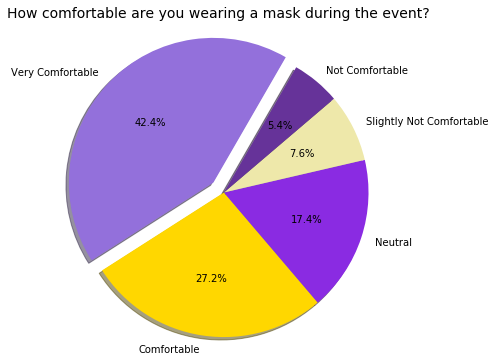

In [62]:
plt.figure(figsize = (6, 6))
plt.title('How comfortable are you wearing a mask during the event?', size= 14)
labels = 'Very Comfortable', 'Comfortable','Neutral', 'Slightly Not Comfortable', 'Not Comfortable'
sizes = [39, 25, 16, 7, 5]
colors = ['mediumpurple', 'gold', 'blueviolet','palegoldenrod', 'rebeccapurple']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle= 60)

plt.axis('equal')
plt.show()

**Oberservation:** Considering masks is still such a hot issue I thought this question was imporant to highlight. 

In [11]:
survey['Contact Tracing'].value_counts()

5 - Very comfortable            30
3 - Neutral                     20
4 - Comfortable                 16
2 - Slightly not comfortable    15
1 - Not comfortable             11
Name: Contact Tracing, dtype: int64

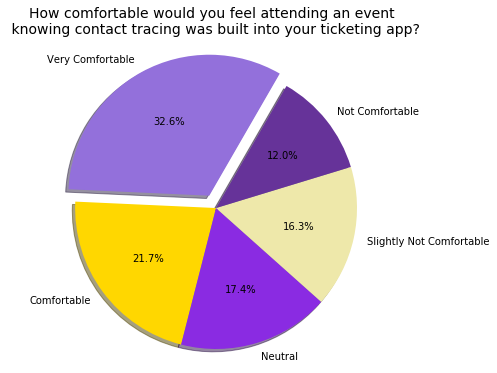

In [63]:
plt.figure(figsize = (6, 6))
plt.title('How comfortable would you feel attending an event \n knowing contact tracing was built into your ticketing app?', size= 14)
labels = 'Very Comfortable', 'Comfortable','Neutral', 'Slightly Not Comfortable', 'Not Comfortable'
sizes = [30, 20, 16, 15, 11]
colors = ['mediumpurple', 'gold', 'blueviolet','palegoldenrod', 'rebeccapurple']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle= 60)

plt.axis('equal')
plt.show()

**Observation:** One of the features of our app is the ability to self-report a positive COVID test after attending an event. Some survey respondents were less comfortable with this health and safety measure than the others.

#### Other survey questions 

The other survey questions pertain to the purchase of food and merchandise at the event, something we were considering adding to the app. For food, 46.7% of people responded that they are likely or very likely to buy food at the event. When asked if they would be more likely to purchase if they could do so through an app 43.5% said yes. Only 22.8% of respondents responded that they are likely or very likely to purchase merchandise. When asked if they would be more likely to purchase merchandise through an app only 29.3% responded yes. 

### Free Response Survey Questions 

There were 45 meaningful responses to the health and safety concerns question and 33 responses on other features you are looking for from a ticketing app question. I did not consider this enough data to find any sentiment analysis tools useful. I've instead found most common themes among the results. 

**Anything else about health and safety at events that concerns you?** 
- Top concern was the distance between seats and maintaining social distance through crowded areas such as the entrances/ exits and the restrooms. 
- The next top concern was the enforcement of masks at the event and other people's behavior. 
- A couple respondents said it was too soon for them to feel comfortable thinking of attending events. 

**Any other features you are looking for from a ticketing/ events app?** 
- The most requested feature was clear outline of the events Health and Safety regulations. One respondent even suggested an agreement page in the app. 
- Contactless or RFDI entrance was another popular request 
- Maps of the venue as well as event schedule was also requested. 
- 2 respondents mentioned social component to the app

### What data can be collected?

Data is collected through out the process, from the initial sign-up, there is the gathering of the consumers address as well as any company affiliation. Once at the event, we know when the guest scans in and out with their ticket. Once more features become live we'll have a payment option which will allow us to track the average amount spent at the events. We've had a lot of great features that we've discussed over the past week, ordering food/beverages and merchandise through the app, all of which ways to gather additional data and insights on the consumer. 

On the admin side, we're able to track the capacity of all areas with both the scan in and out feature but also the consumers geolocation data, you'd be able to track the density of people in different areas. This would be easy to track on any dashboard software. As the features in the app expand the information available in real time would also. 

In regards to what data can be legally collected. That would have to do with the client. CCPA, one of the only active data laws in the country has 3 thresholds that must be met before you're required to comply: the companies total revenue, the number of consumer's data they possess, and how much of their revenue is made selling consumer data.
